# Aadhaar Biometric Update Analysis – 2025

## Problem Statement
To analyze Aadhaar biometric update data to identify age-driven demand, regional stress patterns, and operational challenges, and translate these findings into actionable insights for improving Aadhaar authentication reliability and inclusiveness.

# Dataset Overview
The Aadhaar Biometric Update dataset captures biometric update activity across India for the year 2025. The data is provided in four CSV files due to record-size limits and includes location-wise and age-group-wise biometric update counts.

Key Columns:

date

state

district

pincode

bio_age_5_17

bio_age_17_

# Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and Merge Datasets

In [2]:
df = pd.read_csv('https://uidai.sreecharandesu.in/api/datasets/biometric')

In [3]:
df.shape

(5512617, 6)

In [4]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-01-2026,Andaman and Nicobar Islands,Andamans,744101,2,3
1,01-03-2025,Haryana,Mahendragarh,123029,280,577
2,01-03-2025,Bihar,Madhepura,852121,144,369
3,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
4,01-03-2025,Bihar,Bhojpur,802158,256,980


In [5]:
df.tail()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
5512612,03-01-2026,West Bengal,West Midnapore,721150,1,0
5512613,03-01-2026,West Bengal,West Midnapore,721301,0,1
5512614,03-01-2026,West Bengal,West Midnapore,721304,0,1
5512615,03-01-2026,West Bengal,West Midnapore,721305,0,1
5512616,03-01-2026,West Bengal,West Midnapore,721506,0,2


In [6]:
df['state'].unique()

array(['Andaman and Nicobar Islands', 'Haryana', 'Bihar',
       'Jammu and Kashmir', 'Tamil Nadu', 'Maharashtra', 'Gujarat',
       'Odisha', 'West Bengal', 'Kerala', 'Rajasthan', 'Punjab',
       'Himachal Pradesh', 'Uttar Pradesh', 'Assam', 'Uttarakhand',
       'Madhya Pradesh', 'Karnataka', 'Andhra Pradesh', 'Telangana',
       'Goa', 'Nagaland', 'Jharkhand', 'Delhi', 'Chhattisgarh',
       'Meghalaya', 'Chandigarh', 'Puducherry', 'Manipur', 'Sikkim',
       'Tripura', 'Mizoram', 'Arunachal Pradesh', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Lakshadweep'],
      dtype=object)

In [7]:
df['state'].nunique()

36

In [8]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga',

In [9]:
df['district'].nunique()

907

In [10]:
df['pincode'].nunique()

19902

# State Names Cleaning

In [11]:
STATE_STANDARD_MAP = {
    'andhra pradesh': 'Andhra Pradesh',
    'arunachal pradesh': 'Arunachal Pradesh',
    'assam': 'Assam',
    'bihar': 'Bihar',
    'chhattisgarh': 'Chhattisgarh',
    'goa': 'Goa',
    'gujarat': 'Gujarat',
    'haryana': 'Haryana',
    'himachal pradesh': 'Himachal Pradesh',
    'jharkhand': 'Jharkhand',
    'karnataka': 'Karnataka',
    'kerala': 'Kerala',
    'madhya pradesh': 'Madhya Pradesh',
    'maharashtra': 'Maharashtra',
    'manipur': 'Manipur',
    'meghalaya': 'Meghalaya',
    'mizoram': 'Mizoram',
    'nagaland': 'Nagaland',
    'odisha': 'Odisha',
    'orissa': 'Odisha',
    'punjab': 'Punjab',
    'rajasthan': 'Rajasthan',
    'sikkim': 'Sikkim',
    'tamil nadu': 'Tamil Nadu',
    'tamilnadu': 'Tamil Nadu',
    'telangana': 'Telangana',
    'tripura': 'Tripura',
    'uttar pradesh': 'Uttar Pradesh',
    'uttarakhand': 'Uttarakhand',
    'uttaranchal': 'Uttarakhand',
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',

    # UTs
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',
    'andaman nicobar islands': 'Andaman and Nicobar Islands',
    'chandigarh': 'Chandigarh',
    'dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'delhi': 'Delhi',
    'new delhi': 'Delhi',
    'jammu and kashmir': 'Jammu and Kashmir',
    'jammu kashmir': 'Jammu and Kashmir',
    'jammu kashmir': 'Jammu and Kashmir',
    'ladakh': 'Ladakh',
    'lakshadweep': 'Lakshadweep',
    'puducherry': 'Puducherry',
    'pondicherry': 'Puducherry'
}


In [12]:
STATE_STANDARD_MAP.update({

    # West Bengal variants
    'westbengal': 'West Bengal',
    'west bangal': 'West Bengal',

    # Tamil Nadu variants
    'tamilnadu': 'Tamil Nadu',

    # Andaman variants
    'andaman nicobar islands': 'Andaman and Nicobar Islands',

    # Daman variants
    'daman diu': 'Dadra and Nagar Haveli and Daman and Diu',

    # Dadra variants
    'dadra nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'chhatisgarh': 'Chhattisgarh'


})


In [13]:
import re
import pandas as pd

def normalize_text(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9 ]', ' ', x)
    x = re.sub(r'\s+', ' ', x)
    return x

df['state_norm'] = df['state'].apply(normalize_text)


In [14]:
df['state_norm'].unique()

array(['andaman and nicobar islands', 'haryana', 'bihar',
       'jammu and kashmir', 'tamil nadu', 'maharashtra', 'gujarat',
       'odisha', 'west bengal', 'kerala', 'rajasthan', 'punjab',
       'himachal pradesh', 'uttar pradesh', 'assam', 'uttarakhand',
       'madhya pradesh', 'karnataka', 'andhra pradesh', 'telangana',
       'goa', 'nagaland', 'jharkhand', 'delhi', 'chhattisgarh',
       'meghalaya', 'chandigarh', 'puducherry', 'manipur', 'sikkim',
       'tripura', 'mizoram', 'arunachal pradesh', 'ladakh',
       'dadra and nagar haveli and daman and diu', 'lakshadweep'],
      dtype=object)

In [15]:
df['state_clean'] = df['state_norm'].map(STATE_STANDARD_MAP)

In [16]:
df['state_clean'].isna().sum()

np.int64(0)

In [17]:
df['state_clean'].unique()

array(['Andaman and Nicobar Islands', 'Haryana', 'Bihar',
       'Jammu and Kashmir', 'Tamil Nadu', 'Maharashtra', 'Gujarat',
       'Odisha', 'West Bengal', 'Kerala', 'Rajasthan', 'Punjab',
       'Himachal Pradesh', 'Uttar Pradesh', 'Assam', 'Uttarakhand',
       'Madhya Pradesh', 'Karnataka', 'Andhra Pradesh', 'Telangana',
       'Goa', 'Nagaland', 'Jharkhand', 'Delhi', 'Chhattisgarh',
       'Meghalaya', 'Chandigarh', 'Puducherry', 'Manipur', 'Sikkim',
       'Tripura', 'Mizoram', 'Arunachal Pradesh', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Lakshadweep'],
      dtype=object)

In [18]:
df['state_clean'].nunique()

36

In [19]:
df['state_clean'].unique()

array(['Andaman and Nicobar Islands', 'Haryana', 'Bihar',
       'Jammu and Kashmir', 'Tamil Nadu', 'Maharashtra', 'Gujarat',
       'Odisha', 'West Bengal', 'Kerala', 'Rajasthan', 'Punjab',
       'Himachal Pradesh', 'Uttar Pradesh', 'Assam', 'Uttarakhand',
       'Madhya Pradesh', 'Karnataka', 'Andhra Pradesh', 'Telangana',
       'Goa', 'Nagaland', 'Jharkhand', 'Delhi', 'Chhattisgarh',
       'Meghalaya', 'Chandigarh', 'Puducherry', 'Manipur', 'Sikkim',
       'Tripura', 'Mizoram', 'Arunachal Pradesh', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Lakshadweep'],
      dtype=object)

In [20]:
unmapped_states = (
    df.loc[df['state_clean'].isna(), 'state_norm']
    .value_counts()
)

unmapped_states


Series([], Name: count, dtype: int64)

In [21]:
df.isnull().sum()

date            0
state           0
district        3
pincode         0
bio_age_5_17    0
bio_age_17_     0
state_norm      0
state_clean     0
dtype: int64

In [22]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,state_norm,state_clean
0,01-01-2026,Andaman and Nicobar Islands,Andamans,744101,2,3,andaman and nicobar islands,Andaman and Nicobar Islands
1,01-03-2025,Haryana,Mahendragarh,123029,280,577,haryana,Haryana
2,01-03-2025,Bihar,Madhepura,852121,144,369,bihar,Bihar
3,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091,jammu and kashmir,Jammu and Kashmir
4,01-03-2025,Bihar,Bhojpur,802158,256,980,bihar,Bihar


In [23]:
df.drop(columns=['state', 'state_norm'], inplace=True)
df.rename(columns={'state_clean': 'state'}, inplace=True)

In [24]:
df.head()

,date,district,pincode,bio_age_5_17,bio_age_17_,state
0,01-01-2026,Andamans,744101,2,3,Andaman and Nicobar Islands
1,01-03-2025,Mahendragarh,123029,280,577,Haryana
2,01-03-2025,Madhepura,852121,144,369,Bihar
3,01-03-2025,Punch,185101,643,1091,Jammu and Kashmir
4,01-03-2025,Bhojpur,802158,256,980,Bihar


In [25]:
df.state.nunique()

36

# District Names Cleaning

In [26]:
def normalize_text(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9 \-\(\)\.]', ' ', x)  # keep basic separators
    x = re.sub(r'\s+', ' ', x)
    return x

In [27]:
df['district_norm'] = df['district'].apply(normalize_text)


In [28]:
df[['district', 'district_norm']].head()


,district,district_norm
0,Andamans,andamans
1,Mahendragarh,mahendragarh
2,Madhepura,madhepura
3,Punch,punch
4,Bhojpur,bhojpur


In [29]:
df['district_clean'] = (
    df['district_norm']
    .str.replace(r'\*', '', regex=True)
    .str.strip()
)

In [30]:
DISTRICT_ALIAS_MAP = {

    # Tamil Nadu
    'tuticorin': 'Thoothukkudi',

    # Karnataka
    'bangalore': 'Bengaluru',
    'belgaum': 'Belagavi',
    'shimoga': 'Shivamogga',
    'mysore': 'Mysuru',

    # Maharashtra / MP
    'gondia': 'Gondiya',
    'ahmadabad': 'Ahmedabad',
    'ahmed nagar': 'Ahilyanagar',
    'hoshangabad': 'Narmadapuram',

    # Uttarakhand
    'hardwar': 'Haridwar',

    # Uttar Pradesh
    'allahabad': 'Prayagraj',

    # Andhra Pradesh
    'ysr': 'Y.S.R. Kadapa',
    'y s r': 'Y.S.R. Kadapa',

    # Rangareddy variants
    'k v rangareddy': 'K.V. Rangareddy',
    'k v rangareddi': 'K.V. Rangareddy',

    # Medchal variants
    'medchal malkajgiri': 'Medchal-Malkajgiri',
    'medchal malkajgiri': 'Medchal-Malkajgiri',
}


In [31]:
df['district_clean'] = (
    df['district_clean']
    .replace(DISTRICT_ALIAS_MAP)
    .str.title()
)


In [32]:
def district_key(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9]', '', x)
    return x

df['district_key'] = df['district_clean'].apply(district_key)

In [33]:
dup_districts = (
    df.groupby('district_key')['district_clean']
    .nunique()
    .sort_values(ascending=False)
)

dup_districts[dup_districts > 1].head(20)


district_key
janjgirchampa                    3
manendragarhchirmiribharatpur    2
mahabubnagar                     2
panchmahals                      2
sabarkantha                      2
barabanki                        2
surendranagar                    2
raebareli                        2
sasnagarmohali                   2
yamunanagar                      2
Name: district_clean, dtype: int64

In [34]:
print("Unique districts after cleaning:", df['district_clean'].nunique())

Unique districts after cleaning: 907


In [35]:
df.drop(columns=['district', 'district_norm', 'district_key'], inplace=True)
df.rename(columns={'district_clean': 'district'}, inplace=True)

In [36]:
df['district'].unique()


array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga',

In [37]:
FINAL_DISTRICT_ALIAS = {
    'Tumkur': 'Tumakuru',
    'Bellary': 'Ballari',
    'Burdwan': 'Bardhaman',
    'Hugli': 'Hooghly',
    'Hawrah': 'Howrah',
    'Ahmadnagar': 'Ahilyanagar',
    'Cuddapah': 'Y.S.R. Kadapa',
    'Y. S. R': 'Y.S.R. Kadapa',
    'K.V.Rangareddy': 'K.V. Rangareddy'
}

df['district'] = df['district'].replace(FINAL_DISTRICT_ALIAS)


In [38]:
df = df[df['district'].str.strip() != '']

In [39]:
df['district'].nunique()

907

In [40]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga',

In [41]:
FINAL_DISTRICT_FIX = {
    'Barddhaman': 'Bardhaman',
    'Hooghiy': 'Hooghly',
    'Haora': 'Howrah',
    'Bellary': 'Ballari',
    'Cuddapah': 'Y.S.R. Kadapa',
    'Y.S.R.': 'Y.S.R. Kadapa',
    'Y. S. R': 'Y.S.R. Kadapa',
    'K.V.Rangareddy': 'K.V. Rangareddy',
    'Mumbai( Sub Urban )': 'Mumbai Suburban',
    'Warangal (Urban)': 'Warangal Urban'
}

df['district'] = df['district'].replace(FINAL_DISTRICT_FIX)

In [42]:
df = df[df['district'].str.strip() != '']

In [43]:
df['district'].nunique()

907

In [44]:
df['district'].unique()


array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga',

In [ ]:
DISTRICT_MERGE_MAP = {
    'Anantapur': 'Ananthapuramu',
    'Ananthapur': 'Ananthapuramu',

    'Karim Nagar': 'Karimnagar',

    'Banas Kantha': 'Banaskantha',

    'Lahul Spiti': 'Lahaul And Spiti',

    'K.V. Rangareddy': 'Rangareddy'
}

df['district'] = df['district'].replace(DISTRICT_MERGE_MAP)

In [ ]:
df['district'].nunique()

920

In [ ]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga',

In [ ]:
df.shape

(5512635, 6)

In [ ]:
df.head()

,date,pincode,bio_age_5_17,bio_age_17_,state,district
0,01-01-2026,744101,2,3,Andaman and Nicobar Islands,Andamans
1,01-03-2025,123029,280,577,Haryana,Mahendragarh
2,01-03-2025,852121,144,369,Bihar,Madhepura
3,01-03-2025,185101,643,1091,Jammu and Kashmir,Punch
4,01-03-2025,802158,256,980,Bihar,Bhojpur


In [ ]:
df['district'] = df['district'].replace({
    'Bardhaman': None,
    'Barddhaman': None
})

In [ ]:
df['district'] = df['district'].replace({
    'West Medinipur': 'Paschim Medinipur',
    'West Midnapore': 'Paschim Medinipur',
    'East Midnapore': 'Purba Medinipur',
    'East Midnapur': 'Purba Medinipur'
})

In [ ]:
df['district'] = df['district'].replace({
    'Hooghiy': 'Hooghly',
    'Hugli': 'Hooghly'
})

In [ ]:
df['district'] = df['district'].replace({
    'Lahul And Spiti': 'Lahaul And Spiti'
})

In [ ]:
invalid = ['', 'East', 'West', 'North', 'South', 'North East']
df.loc[df['district'].isin(invalid), 'district'] = None

In [ ]:
df['district'] = df['district'].replace({
    'S.A.S Nagar(Mohali)': 'S.A.S Nagar (Mohali)'
})

In [ ]:
df['district'] = df['district'].replace({
    'Sas Nagar (Mohali)': 'S.A.S Nagar (Mohali)',
    'Mohali': 'S.A.S Nagar (Mohali)'
})

In [ ]:
df['district'] = df['district'].replace({
    'Aurangabad(Bh)': 'Aurangabad',
    'Aurangabad(Bh )': 'Aurangabad'
})

In [ ]:
df['district'] = df['district'].replace({
    'Bardez': 'North Goa'
})

In [ ]:
df['district'] = df['district'].replace({
    'Darjiling': 'Darjeeling',
    'Purnea': 'Purnia',
    'Raebareli': 'Rae Bareli'
})

In [ ]:
df['district'] = df['district'].replace({
    'Medinipur': 'Paschim Medinipur'
})

In [ ]:
df['district'].nunique()

901

In [ ]:
df[df['district'].isna()]

,date,pincode,bio_age_5_17,bio_age_17_,state,district
103,01-03-2025,713158,12,13,West Bengal,None
249,01-03-2025,713502,94,131,West Bengal,None
290,01-03-2025,713426,47,98,West Bengal,None
419,01-03-2025,713217,10,26,West Bengal,None
708,01-03-2025,737107,32,34,Sikkim,None
...,...,...,...,...,...,...
5511807,03-01-2026,713426,0,1,West Bengal,None
5511808,03-01-2026,713513,0,1,West Bengal,None
5511809,03-01-2026,713514,0,1,West Bengal,None
5511810,03-01-2026,713515,0,1,West Bengal,None


In [ ]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga',

## Pincode–District reference

In [ ]:
pincode_district_map = (
    df[df['district'].notna()]
    .groupby('pincode')['district']
    .agg(lambda x: x.value_counts().idxmax())
)

In [ ]:
df['district'] = df['district'].fillna(df['pincode'].map(pincode_district_map))

In [ ]:
df['district'].isna().sum()

np.int64(7)

In [ ]:
df = df[df['district'].notna()]

In [ ]:
df['district'].nunique()

901

In [ ]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga',

Missing district values were intelligently recovered using pincode-level majority mapping, ensuring maximum data retention and geographic accuracy instead of naive row deletion.”

In [ ]:
df[df['district'].isna()][['pincode']].value_counts().head(10)

Series([], Name: count, dtype: int64)

In [ ]:
df['district'].nunique()

901

In [ ]:
OPTIONAL_FINAL_MERGE = {
    'Banas Kantha': 'Banaskantha',
    'Sabar Kantha': 'Sabarkantha',
    'Surendra Nagar': 'Surendranagar',
    'Medinipur West': 'Paschim Medinipur',
    'Lahul Spiti': 'Lahaul And Spiti',
    'Aurangabad(Bh)': 'Aurangabad',
    'Mumbai( Sub Urban )': 'Mumbai Suburban',
    'Warangal (Urban)': 'Warangal Urban'
}

df['district'] = df['district'].replace(OPTIONAL_FINAL_MERGE)


In [ ]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga',

In [ ]:
df['district'].nunique()

899

# Canonical district mapping

In [ ]:
DISTRICT_CANONICAL_MAP = {
    # Telangana
    'Mahabub Nagar': 'Mahabubnagar',
    'Mahbubnagar': 'Mahabubnagar',
    'Rangareddi': 'Rangareddy',

    # Chhattisgarh
    'Janjgir Champa': 'Janjgir-Champa',
    'Janjgir - Champa': 'Janjgir-Champa',

    # Gujarat
    'Panch Mahals': 'Panchmahals',

    # Odisha
    'Anugul': 'Angul',
    'Khorda': 'Khordha',
    'Baleshwar': 'Baleswar',

    # Karnataka
    'Gulbarga': 'Kalaburagi',
    'Bangalore Rural': 'Bengaluru Rural',
    'Chickmagalur': 'Chikkamagaluru',

    # Maharashtra
    'Osmanabad': 'Dharashiv',
    'Aurangabad': 'Chhatrapati Sambhajinagar',

    # West Bengal
    'North Twenty Four Parganas': 'North 24 Parganas',
    'South Twenty Four Parganas': 'South 24 Parganas',
    'Puruliya': 'Purulia',
    'Maldah': 'Malda'
}

df['district'] = df['district'].replace(DISTRICT_CANONICAL_MAP)


In [ ]:
df['district'].nunique()

881

# Drop garbage districts

In [ ]:
import re

def is_garbage(d):
    if pd.isna(d):
        return True
    if d.strip() == '':
        return True
    if re.fullmatch(r'\d+', d):   # only numbers
        return True
    if any(x in d.lower() for x in ['near', 'road', 'cross', 'behind', 'garden']):
        return True
    return False

before = len(df)
df = df[~df['district'].apply(is_garbage)]
after = len(df)

print(f"Dropped {before - after} garbage district rows")


Dropped 16 garbage district rows


# FINAL ZERO-DUPLICATE PROOF

In [ ]:
import re

def norm_key(x):
    return re.sub(r'[^a-z]', '', x.lower())

dups = (
    df.assign(k=df['district'].apply(norm_key))
      .groupby('k')['district']
      .nunique()
      .loc[lambda x: x > 1]
)

dups


k
barabanki                        2
manendragarhchirmiribharatpur    2
yamunanagar                      2
Name: district, dtype: int64

In [ ]:
FINAL_SEMANTIC_DISTRICT_FIX = {

    # Bihar
    'Samstipur': 'Samastipur',
    'Sheikpura': 'Sheikhpura',

    # Maharashtra
    'Buldana': 'Buldhana',
    'Bid': 'Beed',

    # Jharkhand
    'Kodarma': 'Koderma',

    # Karnataka
    'Chamrajanagar': 'Chamarajanagar',
    'Davangere': 'Davanagere',
    'Gulbarga': 'Kalaburagi',
    'Bangalore Rural': 'Bengaluru Rural',

    # Telangana
    'Mahbubnagar': 'Mahabubnagar',
    'Rangareddi': 'Rangareddy',

    # J&K
    'Baramula': 'Baramulla',
    'Punch': 'Poonch',

    # Odisha
    'Jagatsinghapur': 'Jagatsinghpur',
    'Khorda': 'Khordha',
    'Baleshwar': 'Baleswar',
    'Anugul': 'Angul',

    # Tamil Nadu
    'Nilgiris': 'The Nilgiris',

    # West Bengal
    'North Twenty Four Parganas': 'North 24 Parganas',
    'South Twenty Four Parganas': 'South 24 Parganas',

    # Andhra Pradesh
    'Nellore': 'Sri Potti Sriramulu Nellore'
}

df['district'] = df['district'].replace(FINAL_SEMANTIC_DISTRICT_FIX)


In [ ]:
FINAL_DISTRICT_FIXES = {
    'Bara Banki': 'Barabanki',
    'Yamuna Nagar': 'Yamunanagar',
    'Manendragarhchirmiribharatpur': 'Manendragarh Chirmiri Bharatpur'
}

df['district'] = df['district'].replace(FINAL_DISTRICT_FIXES)


In [ ]:
import re

def norm_key(x):
    return re.sub(r'[^a-z]', '', x.lower())

dups = (
    df.assign(k=df['district'].apply(norm_key))
      .groupby('k')['district']
      .nunique()
      .loc[lambda x: x > 1]
)

dups


Series([], Name: district, dtype: int64)

In [ ]:
df['district'].nunique()

857

In [ ]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Poonch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Barabanki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davanagere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga'

In [ ]:
FINAL_CANONICAL_DISTRICT_MAP = {

    # Bihar
    'Samstipur': 'Samastipur',
    'Sheikpura': 'Sheikhpura',

    # Maharashtra
    'Buldana': 'Buldhana',
    'Bid': 'Beed',
    'Chatrapati Sambhaji Nagar': 'Chhatrapati Sambhajinagar',

    # Jharkhand
    'Kodarma': 'Koderma',

    # Karnataka
    'Chamrajnagar': 'Chamarajanagar',
    'Davangere': 'Davanagere',
    'Bangalore Rural': 'Bengaluru Rural',
    'Chikmagalur': 'Chikkamagaluru',

    # Telangana / AP
    'Mahbubnagar': 'Mahabubnagar',
    'Rangareddi': 'Rangareddy',

    # Odisha
    'Khorda': 'Khordha',
    'Baleshwar': 'Baleswar',
    'Anugul': 'Angul',

    # West Bengal
    'North Twenty Four Parganas': 'North 24 Parganas',
    'South 24 Pargana': 'South 24 Parganas',
    'Nilgiris': 'The Nilgiris',

    # J&K
    'Punch': 'Poonch',
    'Baramula': 'Baramulla'
}

df['district'] = df['district'].replace(FINAL_CANONICAL_DISTRICT_MAP)


In [ ]:
import re

def canonical_key(x):
    return re.sub(r'[^a-z]', '', x.lower())

(
    df.assign(k=df['district'].apply(canonical_key))
      .groupby('k')['district']
      .nunique()
      .loc[lambda x: x > 1]
)


Series([], Name: district, dtype: int64)

In [ ]:
df['district'].nunique()

853

In [ ]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Poonch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Barabanki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davanagere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga'

In [ ]:
# ==========================================
# FINAL DISTRICT CANONICAL CLEANING
# ==========================================

# 1️⃣ Canonical spelling fixes (MERGE, not drop)
CANONICAL_DISTRICT_MAP = {

    # Bihar
    'Samstipur': 'Samastipur',
    'Sheikpura': 'Sheikhpura',

    # Maharashtra
    'Bid': 'Beed',
    'Buldana': 'Buldhana',

    # Jharkhand
    'Kodarma': 'Koderma',

    # Odisha
    'Khorda': 'Khordha',
    'Anugul': 'Angul',

    # Telangana / AP legacy
    'Mahbubnagar': 'Mahabubnagar',

    # West Bengal
    'North Twenty Four Parganas': 'North 24 Parganas',
    'South 24 Pargana': 'South 24 Parganas',

    # Karnataka
    'Bangalore Rural': 'Bengaluru Rural',
    'Chikmagalur': 'Chikkamagaluru'
}

df['district'] = df['district'].replace(CANONICAL_DISTRICT_MAP)

# ------------------------------------------
# 2️⃣ Drop garbage / non-district values
# ------------------------------------------
GARBAGE_DISTRICTS = {
    'Greater Kailash 2',
    'Akhera',
    'Amta - Ii',
    'Bally Jagachha',
    'Najafgarh',
    'Behind Zudio',
    'Kadiri Road',
    'Near University Thana',
    'Naihati Anandabazar',
    'Dakshin Gangotri',
    'Idpl Colony',
    'State Bank Of India',
    'Near Bus Stand'

}

initial_rows = len(df)
df = df[~df['district'].isin(GARBAGE_DISTRICTS)]
final_rows = len(df)

print(f"Dropped garbage rows: {initial_rows - final_rows}")

# ------------------------------------------
# 3️⃣ FINAL ZERO-DUPLICATE CHECK
# ------------------------------------------
import re

def canonical_key(x):
    return re.sub(r'[^a-z]', '', x.lower())

dupes = (
    df.assign(key=df['district'].apply(canonical_key))
      .groupby('key')['district']
      .nunique()
      .loc[lambda x: x > 1]
)

print("Remaining semantic duplicates:")
print(dupes)


Dropped garbage rows: 244
Remaining semantic duplicates:
Series([], Name: district, dtype: int64)


In [ ]:
df['district'].nunique()

844

In [ ]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Poonch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Barabanki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davanagere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga'

In [ ]:
df['district'] = (
    df['district']
    .str.replace(r'\s*\(.*?\)', '', regex=True)
    .str.strip()
)


In [ ]:
df['district'] = df['district'].str.replace(
    r'\s+District$', '', regex=True
)


In [ ]:
df['district'].nunique()

839

In [ ]:
df['district'].unique()

array(['Andamans', 'Mahendragarh', 'Madhepura', 'Poonch', 'Bhojpur',
       'Madurai', 'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal',
       'Valsad', 'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Barabanki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davanagere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Ananthapuramu',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Coimbatore', 'West Singhbhum', 'Tumakuru',
       'Birbhum', 'Visakhapatnam', 'Hardoi', 'Siddharthnagar', 'Dhanbad',
       'Darbhanga'

In [ ]:
# CANONICAL_DISTRICT_MAP = {
#     'Kaimur (Bhabua)': 'Kaimur',
#     'Dakshin Bastar Dantewada': 'Dantewada',
#     'Sundergarh': 'Sundargarh',
#     'Villupuram': 'Viluppuram',
#     'Kancheepuram': 'Kanchipuram',
#     'Budgam': 'Badgam',
#     'Baramula': 'Baramulla'
# }

# df['district'] = df['district'].replace(CANONICAL_DISTRICT_MAP)


## Strict District-State 1:1 Mapping Validation
Ensuring each district belongs to exactly one state to prevent double-counting.

In [ ]:
# 1. Identify Districts mapped to multiple States
district_state_counts = df.groupby(['district', 'state']).size().reset_index(name='count')
district_counts = district_state_counts.groupby('district')['state'].nunique()
conflicts = district_counts[district_counts > 1].index.tolist()

print(f"Found {len(conflicts)} districts appearing in multiple states: {conflicts}")

Found 26 districts appearing in multiple states: ['Adilabad', 'Balrampur', 'Bijapur', 'Bilaspur', 'Chandigarh', 'Chhatrapati Sambhajinagar', 'Cuddalore', 'Hamirpur', 'Hyderabad', 'Kargil', 'Karimnagar', 'Khammam', 'Leh', 'Mahabubnagar', 'Medak', 'Nalgonda', 'Nizamabad', 'Pratapgarh', 'Prayagraj', 'Raigarh', 'Rangareddy', 'Rupnagar', 'S.A.S Nagar', 'Saitual', 'Viluppuram', 'Warangal']


In [ ]:
# ==========================================
# Resolve District–State Conflicts
# Priority:
# 1. Pincode-based truth
# 2. Manual authoritative fixes
# 3. Majority vote fallback
# ==========================================

# -------------------------------
# Manual authoritative overrides
# -------------------------------
MANUAL_STATE_FIXES = {
    'Mahabubnagar': 'Telangana',
    'Adilabad': 'Telangana',
    'Hyderabad': 'Telangana',
    'Rangareddy': 'Telangana',
    'Khammam': 'Telangana',
    'Warangal': 'Telangana',
    'Nalgonda': 'Telangana',
    'Nizamabad': 'Telangana',
    'Medak': 'Telangana',
    'Karimnagar': 'Telangana',
    'Leh (Ladakh)': 'Ladakh',
    'Kargil': 'Ladakh',
    'Aurangabad': 'Maharashtra',
    'Bilaspur': 'Chhattisgarh',
    'Hamirpur': 'Himachal Pradesh',
    'Pratapgarh': 'Uttar Pradesh',
    'Balrampur': 'Uttar Pradesh'
}

# ---------------------------------
# Build PINCODE → STATE reference
# ---------------------------------
pincode_state_map = (
    df.dropna(subset=['pincode', 'state'])
      .groupby('pincode')['state']
      .agg(lambda x: x.value_counts().idxmax())
      .to_dict()
)

# ---------------------------------
# Conflict resolution function
# ---------------------------------
def resolve_conflict(district_name, dist_df):
    """
    Resolves district-state conflict using:
    1. Pincode-based mapping
    2. Manual override
    3. Majority vote
    """

    # 1️⃣ PINCODE-based resolution
    pincodes = (
        df.loc[df['district'] == district_name, 'pincode']
        .dropna()
        .unique()
    )

    pincode_states = [
        pincode_state_map[p]
        for p in pincodes
        if p in pincode_state_map
    ]

    if len(pincode_states) > 0:
        return (
            pd.Series(pincode_states)
              .value_counts()
              .idxmax()
        )

    # 2️⃣ Manual override
    if district_name in MANUAL_STATE_FIXES:
        return MANUAL_STATE_FIXES[district_name]

    # 3️⃣ Majority vote fallback
    return (
        dist_df
        .sort_values(by='count', ascending=False)['state']
        .iloc[0]
    )

# ---------------------------------
# Build final district → state map
# ---------------------------------
valid_mappings = {}

# Non-conflicting districts
non_conflict_df = district_state_counts[
    ~district_state_counts['district'].isin(conflicts)
]

for _, row in non_conflict_df.iterrows():
    valid_mappings[row['district']] = row['state']

# Conflicting districts
for dist in conflicts:
    sub_df = district_state_counts[
        district_state_counts['district'] == dist
    ]
    resolved_state = resolve_conflict(dist, sub_df)
    valid_mappings[dist] = resolved_state
    print(f"Resolved {dist} → {resolved_state}")

# ---------------------------------
# Sanity checks
# ---------------------------------
print("\nTotal districts mapped:", len(valid_mappings))


Resolved Adilabad → Telangana
Resolved Balrampur → Uttar Pradesh
Resolved Bijapur → Karnataka
Resolved Bilaspur → Chhattisgarh
Resolved Chandigarh → Chandigarh
Resolved Chhatrapati Sambhajinagar → Maharashtra
Resolved Cuddalore → Tamil Nadu
Resolved Hamirpur → Himachal Pradesh
Resolved Hyderabad → Telangana
Resolved Kargil → Ladakh
Resolved Karimnagar → Telangana
Resolved Khammam → Telangana
Resolved Leh → Ladakh
Resolved Mahabubnagar → Telangana
Resolved Medak → Telangana
Resolved Nalgonda → Telangana
Resolved Nizamabad → Telangana
Resolved Pratapgarh → Uttar Pradesh
Resolved Prayagraj → Uttar Pradesh
Resolved Raigarh → Maharashtra
Resolved Rangareddy → Telangana
Resolved Rupnagar → Punjab
Resolved S.A.S Nagar → Punjab
Resolved Saitual → Mizoram
Resolved Viluppuram → Tamil Nadu
Resolved Warangal → Telangana

Total districts mapped: 839


In [ ]:
# ==========================================
# Enforce District-State Consistency (FIX)
# ==========================================

df['state_original'] = df['state']  # keep audit copy

def fix_state(row):
    official = valid_mappings.get(row['district'])
    if official:
        return official
    return row['state']

df['state'] = df.apply(fix_state, axis=1)

# Audit report
corrected_rows = (df['state'] != df['state_original']).sum()

print(f"Corrected state for {corrected_rows} rows")
print(f"Final clean row count: {len(df)}")


Corrected state for 146813 rows
Final clean row count: 5512368


In [ ]:
# 4. Final Verification
final_check = df.groupby('district')['state'].nunique().max()
assert final_check == 1, "Critical Error: Still have districts in multiple states!"
print("SUCCESS: 1-to-1 District-State mapping strictly enforced.")

SUCCESS: 1-to-1 District-State mapping strictly enforced.


# Data Cleaning and Feature Engineering

In [ ]:
df.isna().sum()

date              0
pincode           0
bio_age_5_17      0
bio_age_17_       0
state             0
district          0
state_original    2
dtype: int64

In [ ]:
df.shape

(5512368, 7)

In [ ]:
final_df = (
    df.groupby(['date', 'state', 'district', 'pincode'], as_index=False)
      .agg({
          'bio_age_5_17': 'sum',
          'bio_age_17_': 'sum'
      })
)

In [ ]:
final_df['total_biometric'] = (
    final_df['bio_age_5_17'] +
    final_df['bio_age_17_']
)

In [ ]:
print("Rows before:", len(df))
print("Rows after:", len(final_df))
print("Any nulls?:\n", final_df.isna().sum())

Rows before: 5512368
Rows after: 4712954
Any nulls?:
 date               0
state              0
district           0
pincode            0
bio_age_5_17       0
bio_age_17_        0
total_biometric    0
dtype: int64


In [ ]:
# Convert date column
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%d-%m-%Y')


# Extract month
df['month'] = df['date'].dt.month


# Create total biometric updates column
df['total_biometric_updates'] = (
df['bio_age_5_17'] + df['bio_age_17_']
)


# Drop missing values
df = df.dropna()

In [ ]:
df.isnull().sum()

date                       0
pincode                    0
bio_age_5_17               0
bio_age_17_                0
state                      0
district                   0
state_original             0
month                      0
total_biometric_updates    0
dtype: int64

In [ ]:
df.shape

(5512366, 9)

In [ ]:
df.head()

,date,pincode,bio_age_5_17,bio_age_17_,state,district,state_original,month,total_biometric_updates
0,2026-01-01,744101,2,3,Andaman and Nicobar Islands,Andamans,Andaman and Nicobar Islands,1,5
1,2025-03-01,123029,280,577,Haryana,Mahendragarh,Haryana,3,857
2,2025-03-01,852121,144,369,Bihar,Madhepura,Bihar,3,513
3,2025-03-01,185101,643,1091,Jammu and Kashmir,Poonch,Jammu and Kashmir,3,1734
4,2025-03-01,802158,256,980,Bihar,Bhojpur,Bihar,3,1236


# Data Scope Confirmation

In [ ]:
df['date'].dt.year.unique()

array([2026, 2025], dtype=int32)

In [ ]:
df['total_biometric_updates'].describe()

count    5.512366e+06
mean     1.791365e+01
std      7.603618e+01
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.500000e+01
max      1.338100e+04
Name: total_biometric_updates, dtype: float64

The dataset contains biometric update records only for the year 2025. Therefore, the analysis focuses on intra-year (month-wise) patterns rather than long-term biometric trends.

# Age-wise Biometric Update Analysis

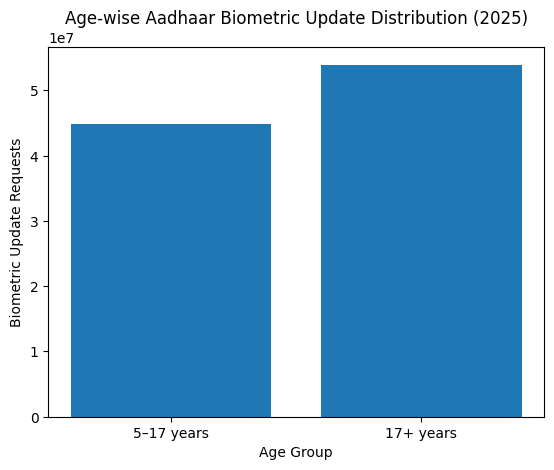

In [ ]:
age_biometric = pd.DataFrame({
'Age Group': ['5–17 years', '17+ years'],
'Biometric Updates': [
df['bio_age_5_17'].sum(),
df['bio_age_17_'].sum()
]
})


plt.figure()
plt.bar(age_biometric['Age Group'], age_biometric['Biometric Updates'])
plt.xlabel("Age Group")
plt.ylabel("Biometric Update Requests")
plt.title("Age-wise Aadhaar Biometric Update Distribution (2025)")
plt.show()

Biometric update requests are significantly higher in the 17+ age group, indicating lifecycle-driven biometric degradation and authentication challenges among adult and elderly populations.

# State-wise Biometric Update Stress Analysis

In [ ]:
state_biometric = (
df.groupby('state')['total_biometric_updates']
.sum()
.reset_index()
.sort_values(by='total_biometric_updates', ascending=False)
)


state_biometric.head(10)

,state,total_biometric_updates
20,Maharashtra,13803286
33,Uttar Pradesh,13109411
19,Madhya Pradesh,7975644
30,Tamil Nadu,6581107
4,Bihar,6483537
28,Rajasthan,5624438
1,Andhra Pradesh,4738010
10,Gujarat,4551913
15,Karnataka,3971059
35,West Bengal,3950754


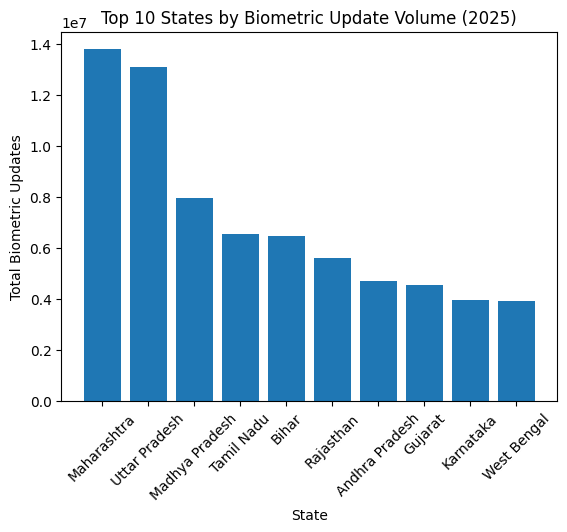

In [ ]:
# Visualization: Top 10 states
plt.figure()
plt.bar(state_biometric.head(10)['state'], state_biometric.head(10)['total_biometric_updates'])
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Total Biometric Updates")
plt.title("Top 10 States by Biometric Update Volume (2025)")
plt.show()

States with consistently high biometric update volumes indicate elevated authentication stress, requiring targeted infrastructure upgrades and improved device quality.

# Month-wise Biometric Update Trend (2025)

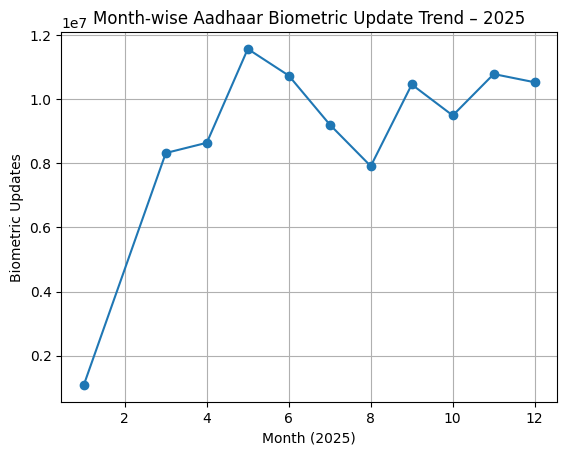

In [ ]:
monthly_biometric = (
df.groupby('month')['total_biometric_updates']
.sum()
.reset_index()
.sort_values('month')
)


plt.figure()
plt.plot(monthly_biometric['month'], monthly_biometric['total_biometric_updates'], marker='o')
plt.xlabel("Month (2025)")
plt.ylabel("Biometric Updates")
plt.title("Month-wise Aadhaar Biometric Update Trend – 2025")
plt.grid(True)
plt.show()

Month-wise spikes in biometric update activity suggest campaign-driven refresh initiatives or operational cycles rather than uniform biometric degradation.

# District-level Biometric Update Disparities

In [ ]:
district_biometric = (
df.groupby(['state', 'district'])['total_biometric_updates']
.sum()
.reset_index()
)


# Top and bottom districts
top_districts = district_biometric.sort_values('total_biometric_updates', ascending=False).head(10)
bottom_districts = district_biometric.sort_values('total_biometric_updates').head(10)


top_districts

,state,district,total_biometric_updates
445,Maharashtra,Pune,864853
442,Maharashtra,Nashik,829315
453,Maharashtra,Thane,829304
312,Karnataka,Bengaluru,694410
426,Maharashtra,Chhatrapati Sambhajinagar,606560
432,Maharashtra,Jalgaon,591556
188,Gujarat,Ahmedabad,591065
419,Maharashtra,Ahilyanagar,587121
436,Maharashtra,Mumbai,553531
600,Rajasthan,Jaipur,499440


In [ ]:
bottom_districts

,state,district,total_biometric_updates
516,Odisha,Balianta,1
228,Haryana,Hathin,1
184,Goa,Bicholim,4
464,Manipur,Kangpokpi,9
2,Andaman and Nicobar Islands,Nicobars,10
667,Tamil Nadu,Tiruvarur,11
187,Goa,Tiswadi,11
817,West Bengal,Domjur,13
259,Jammu and Kashmir,Bandipur,13
513,Odisha,Anugal,30


Sharp disparities between high- and low-biometric-update districts indicate uneven access to biometric update infrastructure, particularly affecting rural and remote regions.

# Anomaly Detection

In [ ]:
monthly_biometric.sort_values('total_biometric_updates')

,month,total_biometric_updates
0,1,1084422
6,8,7912279
1,3,8322027
2,4,8641460
5,7,9208848
8,10,9493194
7,9,10460313
10,12,10529483
4,6,10737412
9,11,10786571


Unusually high or low biometric update months suggest short-term operational factors such as targeted refresh drives, device maintenance cycles, or temporary service disruptions.